In [3]:
from quant_met import plotting, hamiltonians, minimize_free_energy, utils
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
delta_grid = utils.generate_uniform_grid(20, 20, np.array([0, 0.8]), np.array([0.8, 0]), np.array([0, 0]))

In [32]:
free_energy_list = []

lattice_constant = np.sqrt(3)
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, coulomb_gr=6)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)
BZ_grid = utils.generate_uniform_grid(20, 20, all_K_points[1], all_K_points[5], origin=np.array([0, 0]))

for delta in delta_grid:
    free_energy_list.append(minimize_free_energy.free_energy(delta, 100, graphene_h, BZ_grid)) 

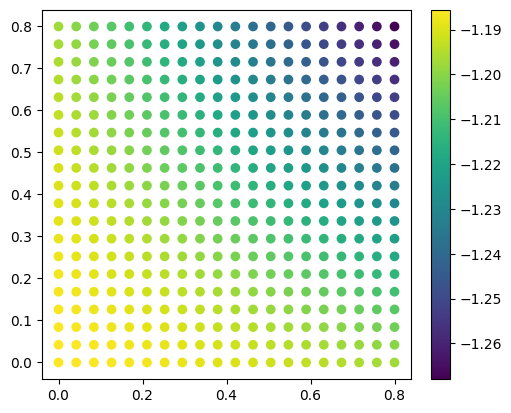

In [33]:
fig, ax = plt.subplots()
scatter = ax.scatter(*zip(*delta_grid), c=np.array(free_energy_list))
fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
ax.set_aspect("equal", adjustable="box")